In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns

# Exploring dataset

In [5]:
df = pd.read_csv("/kaggle/input/healthy-indian-recipes/IndianHealthyRecipe.csv")

In [6]:
df.head()

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
0,Pistachio chicken,Mild chicken in a creamy pistachio sauce,mild,Prep 10 mins,11604,4.1,18.0,4.0,['CONTAINS-NUTS'],30 mins,"1) 600g chicken thighs, cut into chunks\n2) 10...","1) Boil enough water to cover the pistachios, ..."
1,Tangy Fried Okra,Bhindi with Amchoor,medium,Prep 10 mins,49899,4.6,35.0,4.0,['VEGETARIAN'],15 mins,1) 500g okra\n2) 3 tbsp mustard oil\n3) 1 onio...,1) Wash and thoroughly dry the okra (kitchen r...
2,Healthy Chicken Korma,Chicken in Creamy Almond Sauce,mild,Prep 10 mins,115569,3.6,163.0,4.0,['CONTAINS-NUTS'],20 mins,1) 6-8 tbsp natural yoghurt\n2) 1 tsp turmeric...,1) Grind your whole spices in a spice grinder....
3,Brown Lentil Dhal,Sabut Masoor di Dhal,medium,Prep 10 mins,146798,3.7,87.0,4.0,['VEGETARIAN'],20 mins,1) 200g brown lentils\n2) Approx. 1L of water\n,1) Place the lentils in the pressure cooker wi...
4,Thari Wala Chicken,Healthy Chicken Curry,medium,Prep 10 mins,262696,3.5,343.0,4.0,['LACTOSE-FREE'],40 mins,1) 8 pieces of chicken (4 legs cut into thigh ...,"1) Skin the chicken, removing any excess fat.\..."


In [7]:
df.isna().sum()

Dish Name           0
Description         0
Spice               4
Prep Time           1
Views               0
Rating              0
Number of Votes     2
Serves              3
Dietary Info        0
Cook Time          15
Ingredients         0
Instructions        0
dtype: int64

In [8]:
df.shape

(149, 12)

# Dealing with missing values

In [9]:
df["Spice"].fillna(df["Spice"].mode()[0], inplace=True)
df["Prep Time"].fillna(df["Prep Time"].mode()[0], inplace=True)
df["Number of Votes"].fillna(df["Number of Votes"].median(), inplace=True)
df["Serves"].fillna(df["Serves"].median(), inplace=True)
df["Cook Time"].fillna(df["Cook Time"].mode()[0], inplace=True)
df

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
0,Pistachio chicken,Mild chicken in a creamy pistachio sauce,mild,Prep 10 mins,11604,4.1,18.0,4.0,['CONTAINS-NUTS'],30 mins,"1) 600g chicken thighs, cut into chunks\n2) 10...","1) Boil enough water to cover the pistachios, ..."
1,Tangy Fried Okra,Bhindi with Amchoor,medium,Prep 10 mins,49899,4.6,35.0,4.0,['VEGETARIAN'],15 mins,1) 500g okra\n2) 3 tbsp mustard oil\n3) 1 onio...,1) Wash and thoroughly dry the okra (kitchen r...
2,Healthy Chicken Korma,Chicken in Creamy Almond Sauce,mild,Prep 10 mins,115569,3.6,163.0,4.0,['CONTAINS-NUTS'],20 mins,1) 6-8 tbsp natural yoghurt\n2) 1 tsp turmeric...,1) Grind your whole spices in a spice grinder....
3,Brown Lentil Dhal,Sabut Masoor di Dhal,medium,Prep 10 mins,146798,3.7,87.0,4.0,['VEGETARIAN'],20 mins,1) 200g brown lentils\n2) Approx. 1L of water\n,1) Place the lentils in the pressure cooker wi...
4,Thari Wala Chicken,Healthy Chicken Curry,medium,Prep 10 mins,262696,3.5,343.0,4.0,['LACTOSE-FREE'],40 mins,1) 8 pieces of chicken (4 legs cut into thigh ...,"1) Skin the chicken, removing any excess fat.\..."
...,...,...,...,...,...,...,...,...,...,...,...,...
144,"Vegan Wild Rice, Cumin & Chickpea Burgers",Channa Chaul Tikki,medium,Prep 10 mins,12641,4.2,9.0,4.0,['VEGETARIAN'],15 mins,1) 200g cooked and cooled wild rice\n2) 200g t...,1) Cook the rice as per the instructions on th...
145,Vegetable Pilau,Mixed Vegetable Rice,medium,Prep 10 mins,69937,4.0,15.0,4.0,['VEGETARIAN'],20 mins,1) 50g peas\n2) 1 carrot (diced small)\n3) 100...,1) Wash the rice until water runs clear and se...
146,Watermelon and Feta Chaat,Indian Style Watermelon and Feta Salad,medium,Prep 40 mins,16652,4.4,11.0,6.0,['VEGETARIAN'],15 mins,1) 250g atta\n2) salt pinch\n3) 1 tsp ajwain\n...,1) Add the flour to a bowl and mix in the salt...
147,Zambezi Baked Sea Bream,Shama with relish,medium,Prep 5 mins,11808,4.0,7.0,2.0,['LACTOSE-FREE'],20 mins,1) 2 whole sea bream (sea bass fillets if you ...,1) Heat your oven to 180ºC\n2) Remove any scal...


In [10]:
def convert_list(x):
    x = eval(x)
    if len(x) > 0:
        return ", ".join(x)
    return "None"

# Converting dietary from list to a proper description

In [11]:
df["Dietary Info"] = df["Dietary Info"].apply(convert_list)

In [12]:
categories = ["Spice", "Prep Time", "Dietary Info", "Cook Time"]

# Categorical features for recipes

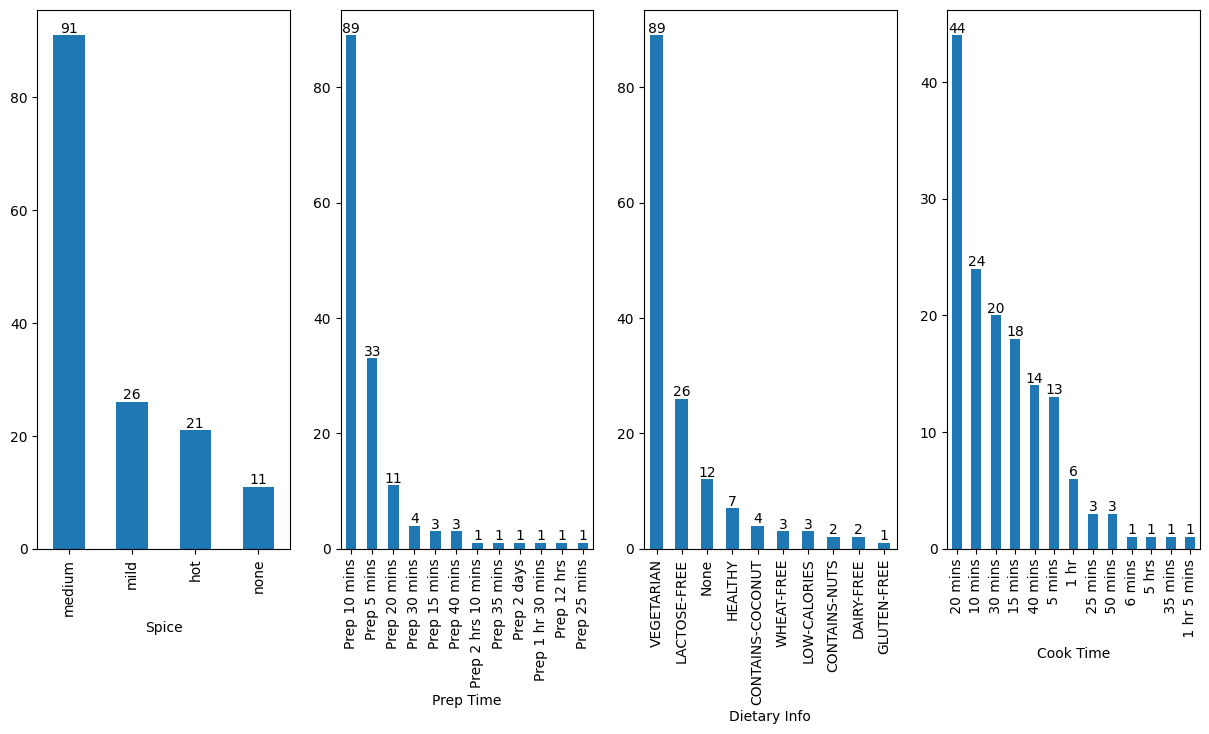

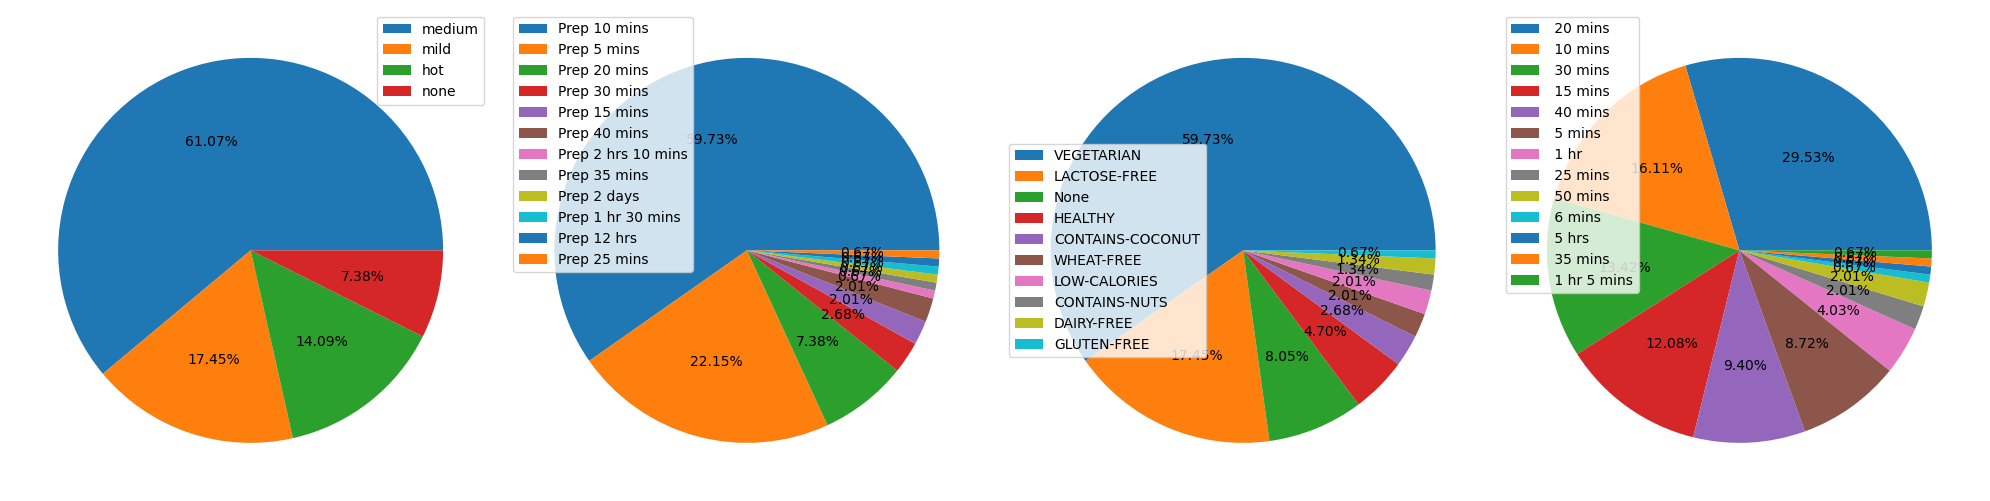

In [ ]:
fig1, axes1 = plt.subplots(nrows=1, ncols=4, figsize=(15, 7))
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
for i, j in enumerate(categories):
    counts = df[j].value_counts()
    counts.plot(kind="bar", ax=axes1[i])
    for container in axes1[i].containers:
        axes1[i].bar_label(container)
    axes[i].pie(counts, autopct="%0.2f%%")
    axes[i].legend(counts.index)
    
plt.tight_layout()
plt.show()

In [14]:
crosstabs = dict()

for i, j in enumerate(categories[:-1]):
    for k in categories[i+1:]:
        crosstab = pd.crosstab(df[j], df[k])
        crosstabs["{} vs {}".format(j, k)] = crosstab

# Categorical crosstabs on heatmaps

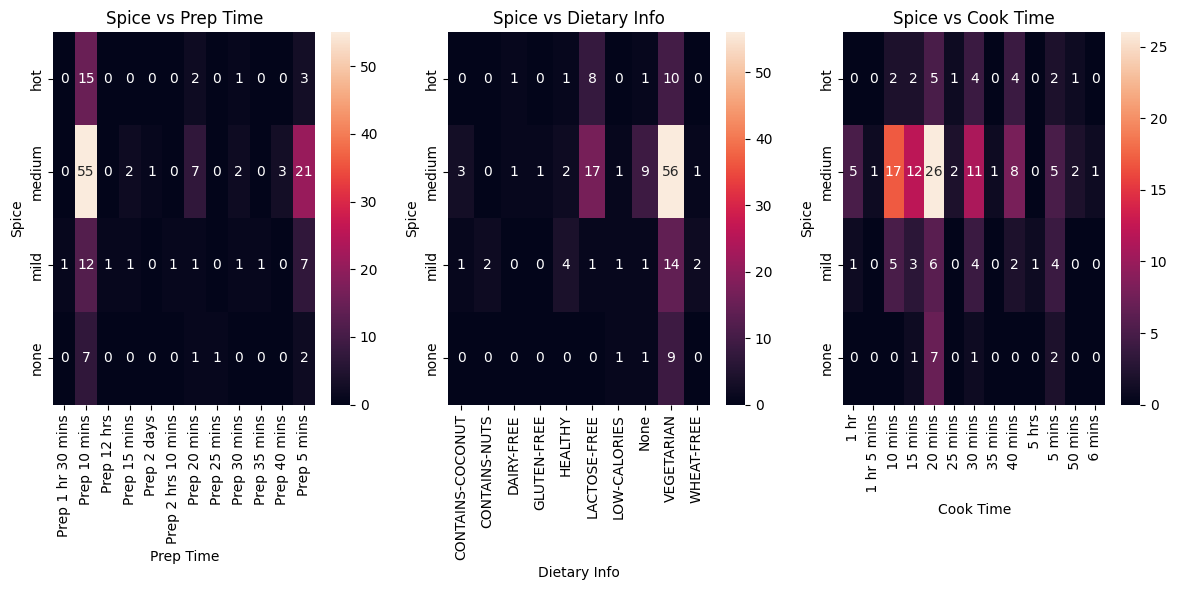

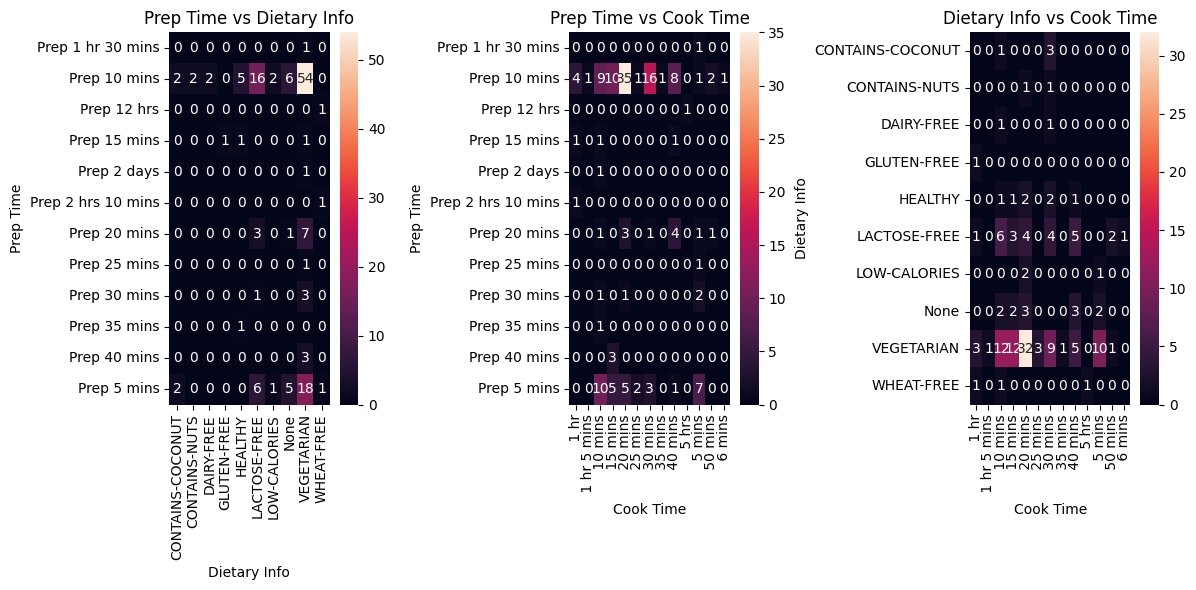

In [15]:
keys = [i for i in crosstabs.keys()]
index = 0
for i in range(2):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
    for j in range(3):
        sns.heatmap(crosstabs[keys[index]], ax=axes[j], annot=True, fmt="d")
        axes[j].set_title(keys[index])
        index += 1
    plt.tight_layout()
    plt.show()

In [19]:
nums = ["Views", "Rating", "Number of Votes", "Serves"]

# Data distirbution for views, ratings, number of votes and serves

In [ ]:
sns.pairplot(df, vars=nums)
plt.show()

# Food spice levels and their ratings distribution

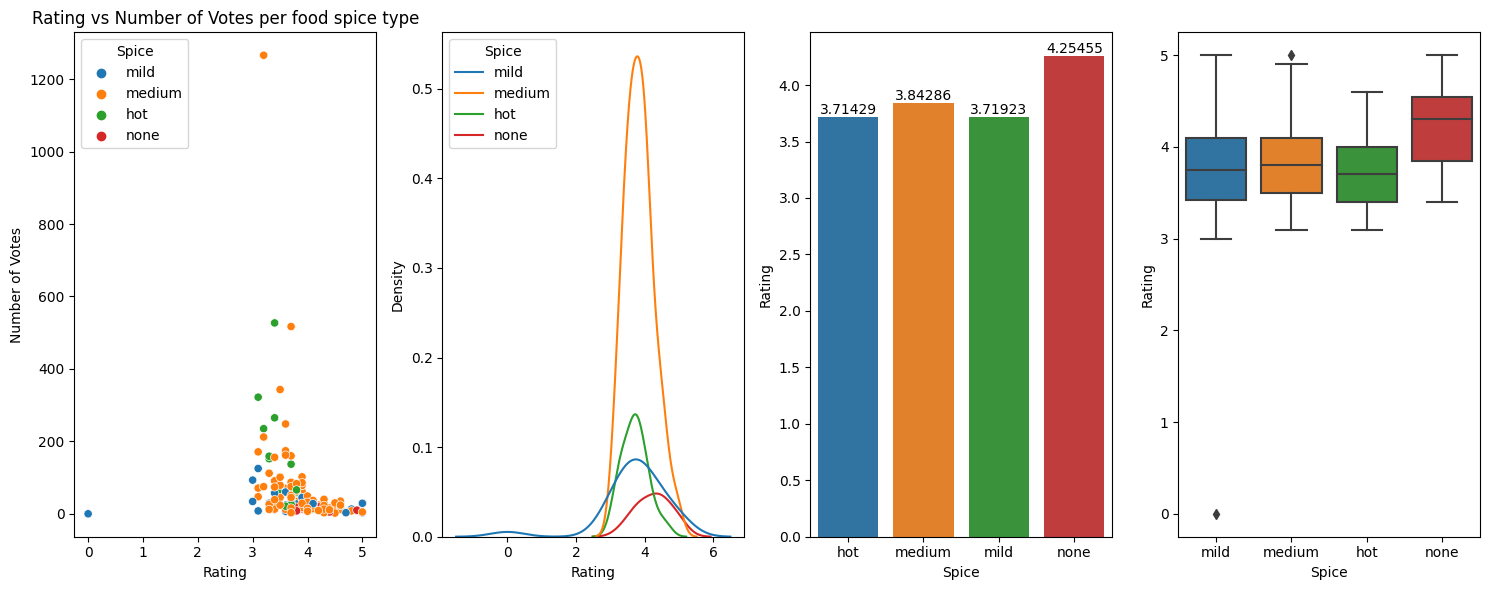

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

sns.scatterplot(df, x="Rating", y="Number of Votes", hue="Spice", ax=axes[0])
axes[0].set_title("Rating vs Number of Votes per food spice type")
sns.kdeplot(df, x="Rating", hue="Spice", ax=axes[1])

groupby = df.groupby("Spice")
mean = groupby["Rating"].mean()
sns.barplot(x=mean.index, y=mean, ax=axes[2])
for container in axes[2].containers:
    axes[2].bar_label(container)
sns.boxplot(df, x="Spice", y="Rating", ax=axes[3])
plt.tight_layout()
plt.show()

# Creating full recipe description

In [22]:
df["describe"] = ""
for i in df.columns[1:]:
    if i not in nums:
        df["describe"] += i + ": " + df[i] + ". "

for i in nums:
    df["describe"] += i + ": " + df[i].astype(str) + ". "

In [23]:
full_dt = df[["Dish Name", "describe"]].copy()

In [25]:
for i in full_dt.columns:
    full_dt[i] = full_dt[i].apply(lambda x: x.lower())

# Vectorising

In [26]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(full_dt["describe"]).toarray()

# Similarity scores

In [27]:
similarity = cosine_similarity(vector)

In [28]:
full_dt.reset_index(inplace=True)

In [29]:
full_dt.drop("index", axis=1, inplace=True)

In [30]:
def similar_article(name):
    name = name.lower()
    indices = full_dt[full_dt["Dish Name"] == name].index[0]
    distances = similarity[indices]
    arr = sorted(list(enumerate(distances)), reverse = True, key=lambda x: x[1])[1:6]
    print("Similar recipes:")
    print()
    row = 1
    for j, i in enumerate(arr):
        print("Recommended recipe number {}: ".format(j+1))
        title = full_dt.loc[i[0], "Dish Name"]
        desc = full_dt.loc[i[0], "describe"]
        print(title.capitalize())
        print(desc)
        print("\n")
        row += 1

# Showing top 5 most recommended similar recipes

In [34]:
print("Dish name ", full_dt.iloc[0, 0])
similar_article(full_dt.iloc[0, 0])

Dish name  pistachio chicken
Similar recipes:

Recommended recipe number 1: 
Gurkha chicken curry
description: nepalese chicken curry. spice: mild. prep time: prep 2 hrs 10 mins. dietary info: wheat-free. cook time:  1 hr. ingredients: 1) 5 green cardamom pods
2) 1 tsp fennel seeds
3) 1 tbsp ginger, roughly chopped
4) 3 garlic cloves, roughly chopped
5) 150g greek yoghurt
6) 8 pieces of chicken, thigh and drumsticks skinned
7) 2 tbsp rapeseed oil
8) 2 onions, sliced
9) 2 tsp cumin seeds
10) 4 cloves
11) 7cm stick of cassia bark
12) 2 bay leaves
13) 1 tsp turmeric
14) ½ tsp mace, ground
15) ¼-1 tsp kashmiri chilli powder
16) 4 medium tomatoes, chopped
. instructions: 1) toast the cardamom pods with the fennel seeds until fragrant. remove from the pan and let them cool.  crush with a pestle and mortar and remove the husk.
2) add the ginger and garlic to the pestle and mortar and bash the to make a paste.
3) put the yoghurt into a large bowl and add the spice paste with the salt and stir 